In [50]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc90/BHOSS_CODE"
data = "Rh10_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93_119.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9238.281441 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 7.64255e-36 0.00261893
Total flux = 1.985647 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9077.464542 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000667849
Total flux = 1.691762 Jy at 230 GHz
166:20:25.430 - Start Program


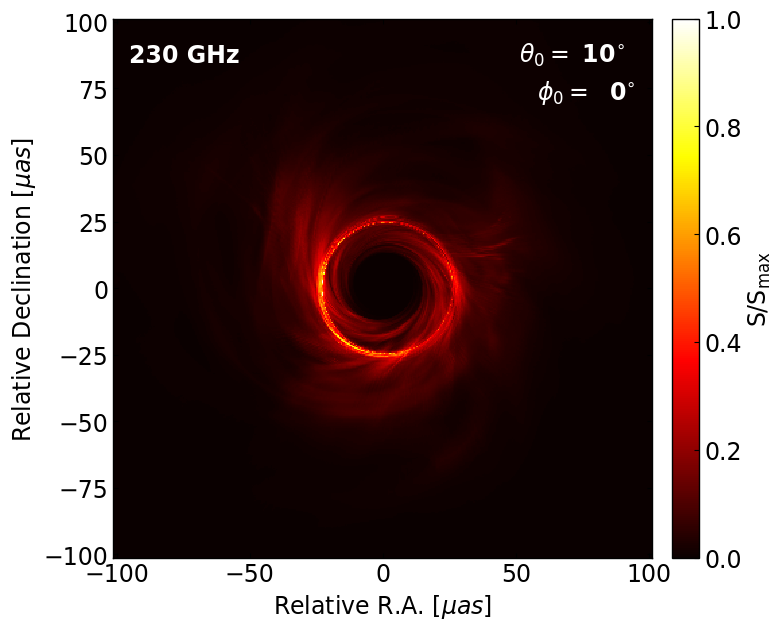

In [8]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [22]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc10/BHOSS_CODE
96, flux: 2.140353 at 9008.139053
97, flux: 2.086585 at 9017.844868
98, flux: 2.046200 at 9027.551100
99, flux: 2.034703 at 9038.646851
100, flux: 2.043992 at 9048.356431
101, flux: 2.036155 at 9058.061637
102, flux: 2.040046 at 9067.764826
103, flux: 2.021031 at 9077.464542
104, flux: 1.974962 at 9088.552963
105, flux: 1.923684 at 9098.254801
106, flux: 1.913340 at 9107.957635
107, flux: 1.917429 at 9117.659184
108, flux: 1.886378 at 9127.363548
109, flux: 1.875312 at 9138.452062
110, flux: 1.869643 at 9148.158890
111, flux: 1.872248 at 9157.868704
112, flux: 1.857219 at 9167.579583
113, flux: 1.848156 at 9178.672003
114, flux: 1.876099 at 9188.377169
115, flux: 1.911864 at 9198.079088
116, flux: 1.902446 at 9207.781556
117, flux: 1.855349 at 9217.482565
118, flux: 1.782592 at 9228.573654
119, flux: 1.767213 at 9238.281441
120, flux: 1.763647 at 9247.990304
121, flux: 1.752260 at 9257.698128
122, flux

In [23]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [24]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.019344 Jy, the density scale = 1.000000e-18


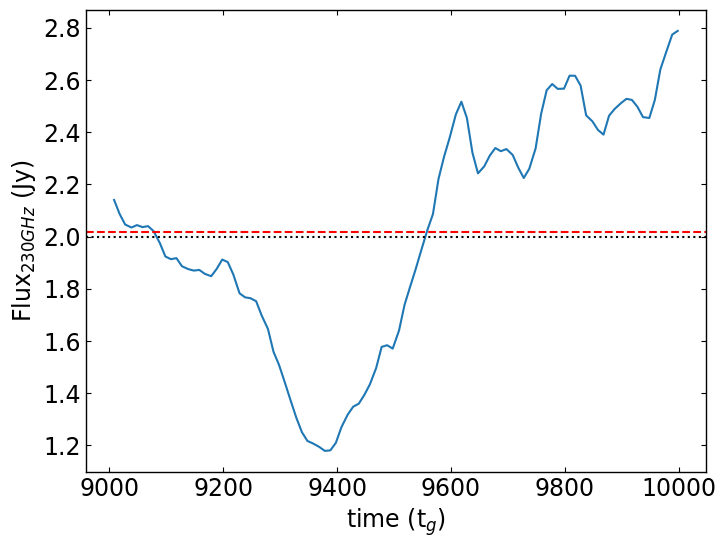

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [26]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.140353 Jy at 9008.139053
97:: 2.086585 Jy at 9017.844868
98:: 2.046200 Jy at 9027.551100
99:: 2.034703 Jy at 9038.646851
100:: 2.043992 Jy at 9048.356431
101:: 2.036155 Jy at 9058.061637
102:: 2.040046 Jy at 9067.764826
103:: 2.021031 Jy at 9077.464542
104:: 1.974962 Jy at 9088.552963
105:: 1.923684 Jy at 9098.254801
106:: 1.913340 Jy at 9107.957635
107:: 1.917429 Jy at 9117.659184
108:: 1.886378 Jy at 9127.363548
109:: 1.875312 Jy at 9138.452062
110:: 1.869643 Jy at 9148.158890
111:: 1.872248 Jy at 9157.868704
112:: 1.857219 Jy at 9167.579583
113:: 1.848156 Jy at 9178.672003
114:: 1.876099 Jy at 9188.377169
115:: 1.911864 Jy at 9198.079088
116:: 1.902446 Jy at 9207.781556
117:: 1.855349 Jy at 9217.482565
118:: 1.782592 Jy at 9228.573654
119:: 1.767213 Jy at 9238.281441
120:: 1.763647 Jy at 9247.990304
121:: 1.752260 Jy at 9257.698128
122:: 1.697680 Jy at 9267.401850
123:: 1.645896 Jy at 9278.487308
124:: 1.558740 Jy at 9288.189770
125:: 1.508403 Jy at 9297.894634
126:: 1.444595

In [27]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc30/BHOSS_CODE
96, flux: 2.181227 at 9008.139053
97, flux: 2.132065 at 9017.844868
98, flux: 2.090974 at 9027.551100
99, flux: 2.068037 at 9038.646851
100, flux: 2.078481 at 9048.356431
101, flux: 2.065438 at 9058.061637
102, flux: 2.066855 at 9067.764826
103, flux: 2.033961 at 9077.464542
104, flux: 1.993699 at 9088.552963
105, flux: 1.945498 at 9098.254801
106, flux: 1.946189 at 9107.957635
107, flux: 1.961303 at 9117.659184
108, flux: 1.939894 at 9127.363548
109, flux: 1.925785 at 9138.452062
110, flux: 1.914223 at 9148.158890
111, flux: 1.898841 at 9157.868704
112, flux: 1.880132 at 9167.579583
113, flux: 1.885892 at 9178.672003
114, flux: 1.923078 at 9188.377169
115, flux: 1.932783 at 9198.079088
116, flux: 1.912895 at 9207.781556
117, flux: 1.862545 at 9217.482565
118, flux: 1.790788 at 9228.573654
119, flux: 1.773434 at 9238.281441
120, flux: 1.769118 at 9247.990304
121, flux: 1.764401 at 9257.698128
122, flux

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.981850 Jy, the density scale = 9.700000e-19


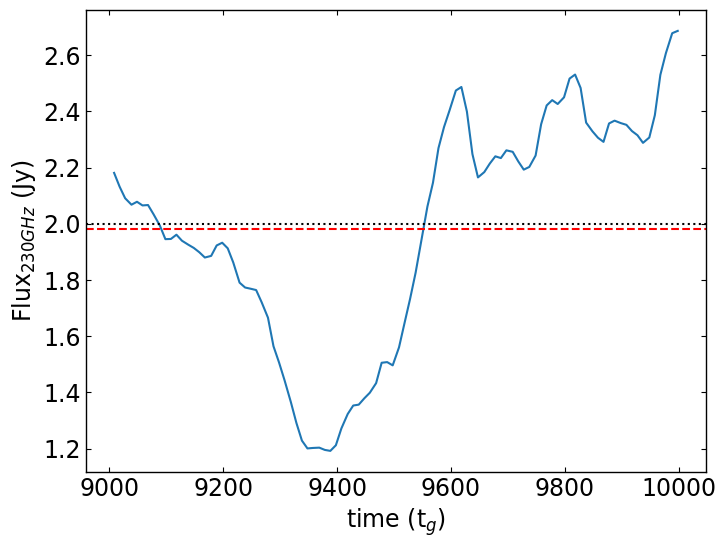

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.181227 Jy at 9008.139053
97:: 2.132065 Jy at 9017.844868
98:: 2.090974 Jy at 9027.551100
99:: 2.068037 Jy at 9038.646851
100:: 2.078481 Jy at 9048.356431
101:: 2.065438 Jy at 9058.061637
102:: 2.066855 Jy at 9067.764826
103:: 2.033961 Jy at 9077.464542
104:: 1.993699 Jy at 9088.552963
105:: 1.945498 Jy at 9098.254801
106:: 1.946189 Jy at 9107.957635
107:: 1.961303 Jy at 9117.659184
108:: 1.939894 Jy at 9127.363548
109:: 1.925785 Jy at 9138.452062
110:: 1.914223 Jy at 9148.158890
111:: 1.898841 Jy at 9157.868704
112:: 1.880132 Jy at 9167.579583
113:: 1.885892 Jy at 9178.672003
114:: 1.923078 Jy at 9188.377169
115:: 1.932783 Jy at 9198.079088
116:: 1.912895 Jy at 9207.781556
117:: 1.862545 Jy at 9217.482565
118:: 1.790788 Jy at 9228.573654
119:: 1.773434 Jy at 9238.281441
120:: 1.769118 Jy at 9247.990304
121:: 1.764401 Jy at 9257.698128
122:: 1.720888 Jy at 9267.401850
123:: 1.666042 Jy at 9278.487308
124:: 1.564363 Jy at 9288.189770
125:: 1.506978 Jy at 9297.894634
126:: 1.443559

In [32]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc50/BHOSS_CODE
96, flux: 2.230806 at 9008.139053
97, flux: 2.182254 at 9017.844868
98, flux: 2.122563 at 9027.551100
99, flux: 2.083526 at 9038.646851
100, flux: 2.098755 at 9048.356431
101, flux: 2.085456 at 9058.061637
102, flux: 2.084483 at 9067.764826
103, flux: 2.055060 at 9077.464542
104, flux: 2.039086 at 9088.552963
105, flux: 2.006883 at 9098.254801
106, flux: 2.035158 at 9107.957635
107, flux: 2.061265 at 9117.659184
108, flux: 2.046561 at 9127.363548
109, flux: 2.040421 at 9138.452062
110, flux: 1.992925 at 9148.158890
111, flux: 1.946064 at 9157.868704
112, flux: 1.928652 at 9167.579583
113, flux: 1.984676 at 9178.672003
114, flux: 1.986081 at 9188.377169
115, flux: 1.964654 at 9198.079088
116, flux: 1.931998 at 9207.781556
117, flux: 1.877258 at 9217.482565
118, flux: 1.805888 at 9228.573654
119, flux: 1.798643 at 9238.281441
120, flux: 1.800084 at 9247.990304
121, flux: 1.821633 at 9257.698128
122, flux

In [33]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [34]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.956341 Jy, the density scale = 9.150000e-19


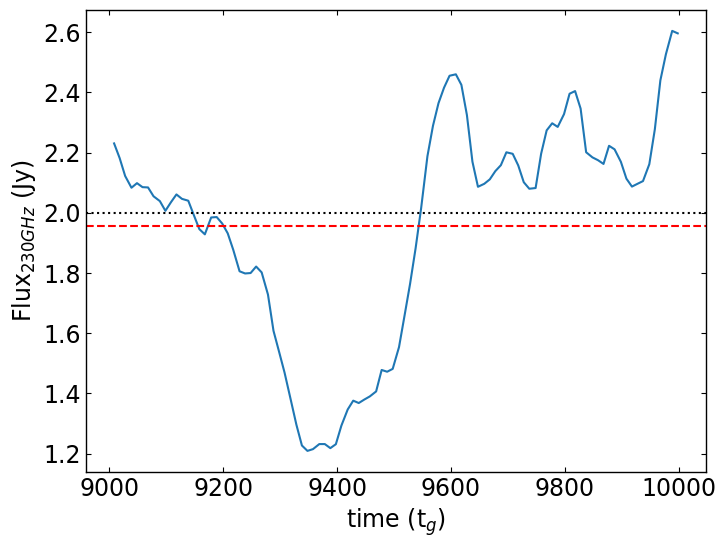

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [36]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.230806 Jy at 9008.139053
97:: 2.182254 Jy at 9017.844868
98:: 2.122563 Jy at 9027.551100
99:: 2.083526 Jy at 9038.646851
100:: 2.098755 Jy at 9048.356431
101:: 2.085456 Jy at 9058.061637
102:: 2.084483 Jy at 9067.764826
103:: 2.055060 Jy at 9077.464542
104:: 2.039086 Jy at 9088.552963
105:: 2.006883 Jy at 9098.254801
106:: 2.035158 Jy at 9107.957635
107:: 2.061265 Jy at 9117.659184
108:: 2.046561 Jy at 9127.363548
109:: 2.040421 Jy at 9138.452062
110:: 1.992925 Jy at 9148.158890
111:: 1.946064 Jy at 9157.868704
112:: 1.928652 Jy at 9167.579583
113:: 1.984676 Jy at 9178.672003
114:: 1.986081 Jy at 9188.377169
115:: 1.964654 Jy at 9198.079088
116:: 1.931998 Jy at 9207.781556
117:: 1.877258 Jy at 9217.482565
118:: 1.805888 Jy at 9228.573654
119:: 1.798643 Jy at 9238.281441
120:: 1.800084 Jy at 9247.990304
121:: 1.821633 Jy at 9257.698128
122:: 1.802193 Jy at 9267.401850
123:: 1.728467 Jy at 9278.487308
124:: 1.608081 Jy at 9288.189770
125:: 1.539240 Jy at 9297.894634
126:: 1.469413

In [51]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc70/BHOSS_CODE
96, flux: 2.327002 at 9008.139053
97, flux: 2.258247 at 9017.844868
98, flux: 2.167034 at 9027.551100
99, flux: 2.127705 at 9038.646851
100, flux: 2.168578 at 9048.356431
101, flux: 2.164811 at 9058.061637
102, flux: 2.170934 at 9067.764826
103, flux: 2.152336 at 9077.464542
104, flux: 2.198977 at 9088.552963
105, flux: 2.161504 at 9098.254801
106, flux: 2.198546 at 9107.957635
107, flux: 2.254799 at 9117.659184
108, flux: 2.227462 at 9127.363548
109, flux: 2.155788 at 9138.452062
110, flux: 2.084478 at 9148.158890
111, flux: 2.072003 at 9157.868704
112, flux: 2.049261 at 9167.579583
113, flux: 2.075432 at 9178.672003
114, flux: 2.087254 at 9188.377169
115, flux: 2.066144 at 9198.079088
116, flux: 2.018227 at 9207.781556
117, flux: 1.977472 at 9217.482565
118, flux: 1.955677 at 9228.573654
119, flux: 1.967101 at 9238.281441
120, flux: 1.994521 at 9247.990304
121, flux: 2.093695 at 9257.698128
122, flux

In [52]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [53]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.998790 Jy, the density scale = 8.700000e-19


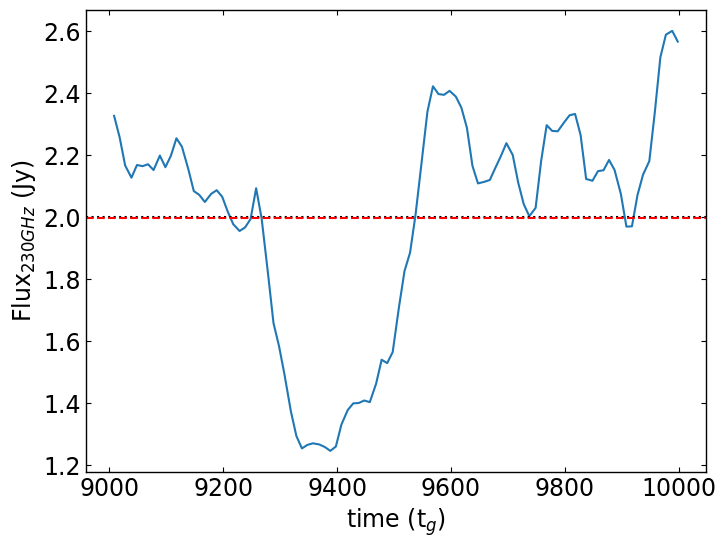

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [55]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.327002 Jy at 9008.139053
97:: 2.258247 Jy at 9017.844868
98:: 2.167034 Jy at 9027.551100
99:: 2.127705 Jy at 9038.646851
100:: 2.168578 Jy at 9048.356431
101:: 2.164811 Jy at 9058.061637
102:: 2.170934 Jy at 9067.764826
103:: 2.152336 Jy at 9077.464542
104:: 2.198977 Jy at 9088.552963
105:: 2.161504 Jy at 9098.254801
106:: 2.198546 Jy at 9107.957635
107:: 2.254799 Jy at 9117.659184
108:: 2.227462 Jy at 9127.363548
109:: 2.155788 Jy at 9138.452062
110:: 2.084478 Jy at 9148.158890
111:: 2.072003 Jy at 9157.868704
112:: 2.049261 Jy at 9167.579583
113:: 2.075432 Jy at 9178.672003
114:: 2.087254 Jy at 9188.377169
115:: 2.066144 Jy at 9198.079088
116:: 2.018227 Jy at 9207.781556
117:: 1.977472 Jy at 9217.482565
118:: 1.955677 Jy at 9228.573654
119:: 1.967101 Jy at 9238.281441
120:: 1.994521 Jy at 9247.990304
121:: 2.093695 Jy at 9257.698128
122:: 1.995325 Jy at 9267.401850
123:: 1.819110 Jy at 9278.487308
124:: 1.658456 Jy at 9288.189770
125:: 1.584314 Jy at 9297.894634
126:: 1.491380

In [56]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc90/BHOSS_CODE
96, flux: 2.342054 at 9008.139053
97, flux: 2.278230 at 9017.844868
98, flux: 2.199369 at 9027.551100
99, flux: 2.164550 at 9038.646851
100, flux: 2.203801 at 9048.356431
101, flux: 2.128655 at 9058.061637
102, flux: 2.135335 at 9067.764826
103, flux: 2.112439 at 9077.464542
104, flux: 2.171201 at 9088.552963
105, flux: 2.118343 at 9098.254801
106, flux: 2.208132 at 9107.957635
107, flux: 2.282349 at 9117.659184
108, flux: 2.218687 at 9127.363548
109, flux: 2.184776 at 9138.452062
110, flux: 2.109711 at 9148.158890
111, flux: 2.116347 at 9157.868704
112, flux: 2.090167 at 9167.579583
113, flux: 2.132739 at 9178.672003
114, flux: 2.098376 at 9188.377169
115, flux: 2.114828 at 9198.079088
116, flux: 2.086531 at 9207.781556
117, flux: 2.026816 at 9217.482565
118, flux: 1.974192 at 9228.573654
119, flux: 2.003689 at 9238.281441
120, flux: 2.027155 at 9247.990304
121, flux: 2.035411 at 9257.698128
122, flux

In [57]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [58]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.997706 Jy, the density scale = 8.350000e-19


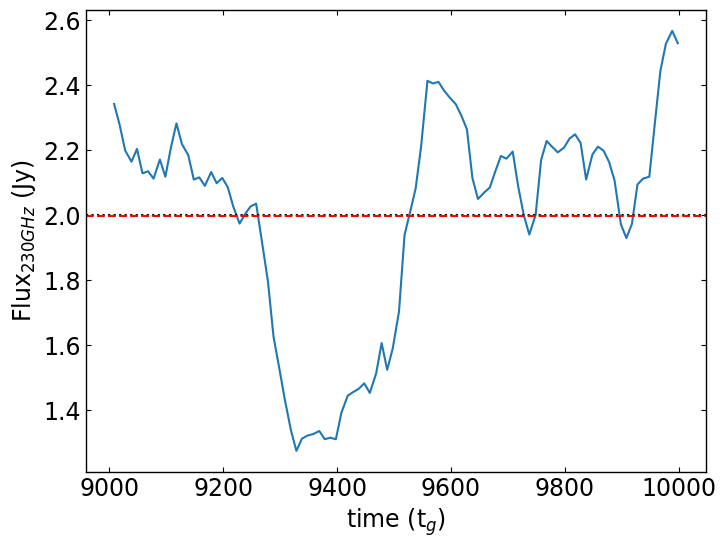

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [60]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.342054 Jy at 9008.139053
97:: 2.278230 Jy at 9017.844868
98:: 2.199369 Jy at 9027.551100
99:: 2.164550 Jy at 9038.646851
100:: 2.203801 Jy at 9048.356431
101:: 2.128655 Jy at 9058.061637
102:: 2.135335 Jy at 9067.764826
103:: 2.112439 Jy at 9077.464542
104:: 2.171201 Jy at 9088.552963
105:: 2.118343 Jy at 9098.254801
106:: 2.208132 Jy at 9107.957635
107:: 2.282349 Jy at 9117.659184
108:: 2.218687 Jy at 9127.363548
109:: 2.184776 Jy at 9138.452062
110:: 2.109711 Jy at 9148.158890
111:: 2.116347 Jy at 9157.868704
112:: 2.090167 Jy at 9167.579583
113:: 2.132739 Jy at 9178.672003
114:: 2.098376 Jy at 9188.377169
115:: 2.114828 Jy at 9198.079088
116:: 2.086531 Jy at 9207.781556
117:: 2.026816 Jy at 9217.482565
118:: 1.974192 Jy at 9228.573654
119:: 2.003689 Jy at 9238.281441
120:: 2.027155 Jy at 9247.990304
121:: 2.035411 Jy at 9257.698128
122:: 1.924271 Jy at 9267.401850
123:: 1.795794 Jy at 9278.487308
124:: 1.626961 Jy at 9288.189770
125:: 1.533479 Jy at 9297.894634
126:: 1.437553